In [1]:
%matplotlib notebook

import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

files = glob.glob("output_folderDICe*.txt")
final_list = sorted(files)
all_displacements = []
z_displacements = []
y_displacements = []
x_displacements = []

print (len(final_list))

for file_name in final_list:
    data = pd.read_csv(file_name)
    all_displacements.append(data)
    z_displacements.append(data.MODEL_DISPLACEMENT_Z)
    y_displacements.append(data.MODEL_DISPLACEMENT_Y)
    x_displacements.append(data.MODEL_DISPLACEMENT_X)

print (len(data.MODEL_DISPLACEMENT_Z))

264
18


In [2]:
final_displacement = []
for file_name in final_list:
    data = pd.read_csv(file_name)
    final_displacement.append(data.MODEL_DISPLACEMENT_Z[16]) #max at 17
fin_disp_2d = np.reshape(final_displacement,(22,12))
fin_disp_2d = fin_disp_2d + (np.min(fin_disp_2d)*-1)
print(fin_disp_2d)

[[3.1274    0.4502    4.96198   4.4039    1.3586    1.3742    4.0126
  1.1526    0.8779    5.859     1.1174    0.       ]
 [0.4176    0.7075    1.0831    1.5136    1.6883    1.7754    1.7475
  1.5162    1.1146    0.9154    0.4661    0.2355   ]
 [0.5756    3.6628    1.4036    1.728     2.0052    2.089     2.0365
  1.7388    1.4863    1.1035    0.7188    0.4069   ]
 [0.75      1.1533    4.7653    2.0947    2.4061    2.532     2.3735
  2.1018    1.8313    1.3042    0.9119    0.6144   ]
 [0.9388    1.4222    5.06747   4.7686    2.7785    2.8514    2.7354
  2.4586    2.0674    1.5539    1.1548    0.7019   ]
 [1.0967    1.6074    2.2504    2.6613    3.1026    3.2852    3.2575
  2.8361    2.2823    1.7709    1.3101    0.9892   ]
 [1.3674    1.8685    2.3929    3.033     3.5382    3.708     5.52289
  3.1549    2.5597    2.0263    1.4569    1.0445   ]
 [1.3836    1.8926    2.6686    3.3477    3.9114    4.2554    5.8555538
  3.5512    2.8131    2.1776    1.5943    1.2717   ]
 [1.4897    2.0409  

(22, 12) (22, 12) (22, 12)


<IPython.core.display.Javascript object>


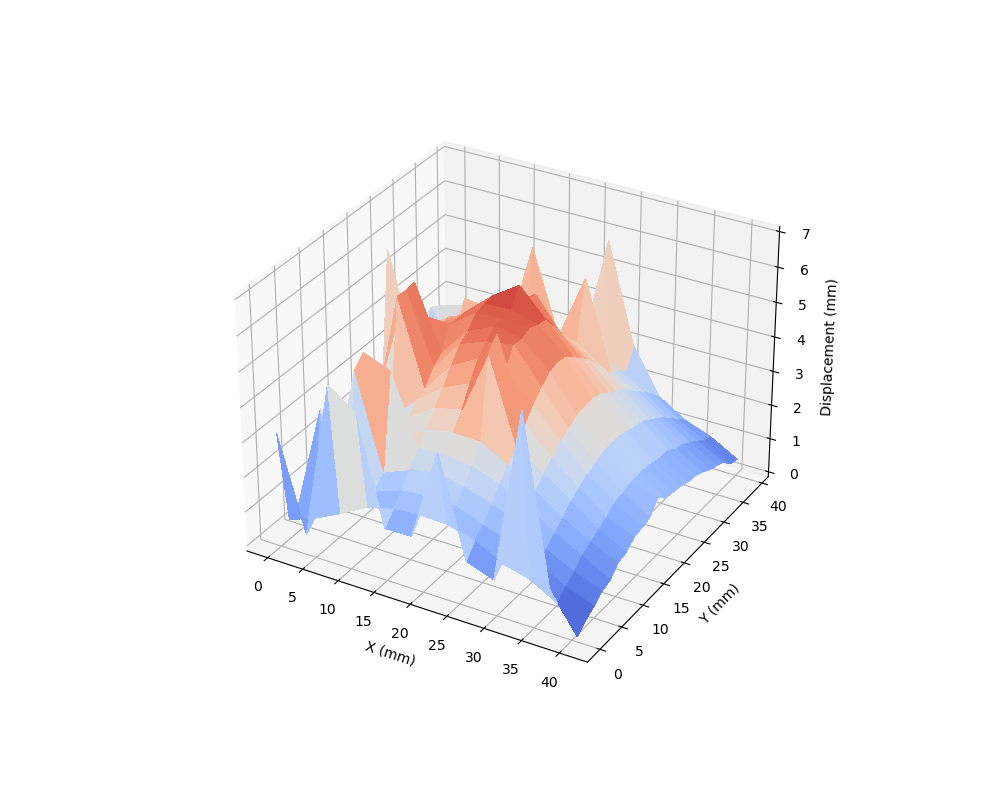

C:\Users\haemi\AppData\Local\Temp\ipykernel_13492\995980363.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [3]:
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]
X = np.arange(0, 44.4, 3.7)
Y = np.arange(0, 40.7, 1.85)
X, Y = np.meshgrid(X, Y)
Z = fin_disp_2d
print (X.shape, Y.shape, Z.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlim(0,7)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False,vmax=6., vmin=0.)
plt.show()

In [4]:
for ridx,row in enumerate(fin_disp_2d):
    last_value = 0
    for cidx,item in enumerate(row):
        old_item = item
        if last_value != 0:            
            if (item-last_value > 0.5):
                fin_disp_2d[ridx][cidx] = last_value
        last_value = item

In [5]:
filtered_displacement = []
filtered_displacement = np.empty(fin_disp_2d.shape, float)

for ridx,row in enumerate(fin_disp_2d):
    for cidx,item in enumerate(row):
        if cidx>=(len(row)-1):
            new_value = (fin_disp_2d[ridx][cidx])
        elif cidx>=(len(row)-2):
            new_value = (fin_disp_2d[ridx][cidx]+fin_disp_2d[ridx][cidx+1])/2
        elif cidx>=(len(row)-3):
            new_value = (fin_disp_2d[ridx][cidx]+fin_disp_2d[ridx][cidx+1]+fin_disp_2d[ridx][cidx+2])/3
        elif cidx>=(len(row)-4):
            new_value = (fin_disp_2d[ridx][cidx]+fin_disp_2d[ridx][cidx+1]+fin_disp_2d[ridx][cidx+2]+fin_disp_2d[ridx][cidx+3])/4
        else:            
            new_value = (fin_disp_2d[ridx][cidx]+fin_disp_2d[ridx][cidx+1]+fin_disp_2d[ridx][cidx+2]+fin_disp_2d[ridx][cidx+3]+fin_disp_2d[ridx][cidx+4])/5
        filtered_displacement[ridx][cidx]=new_value

(22, 12) (22, 12) (22, 12)


<IPython.core.display.Javascript object>


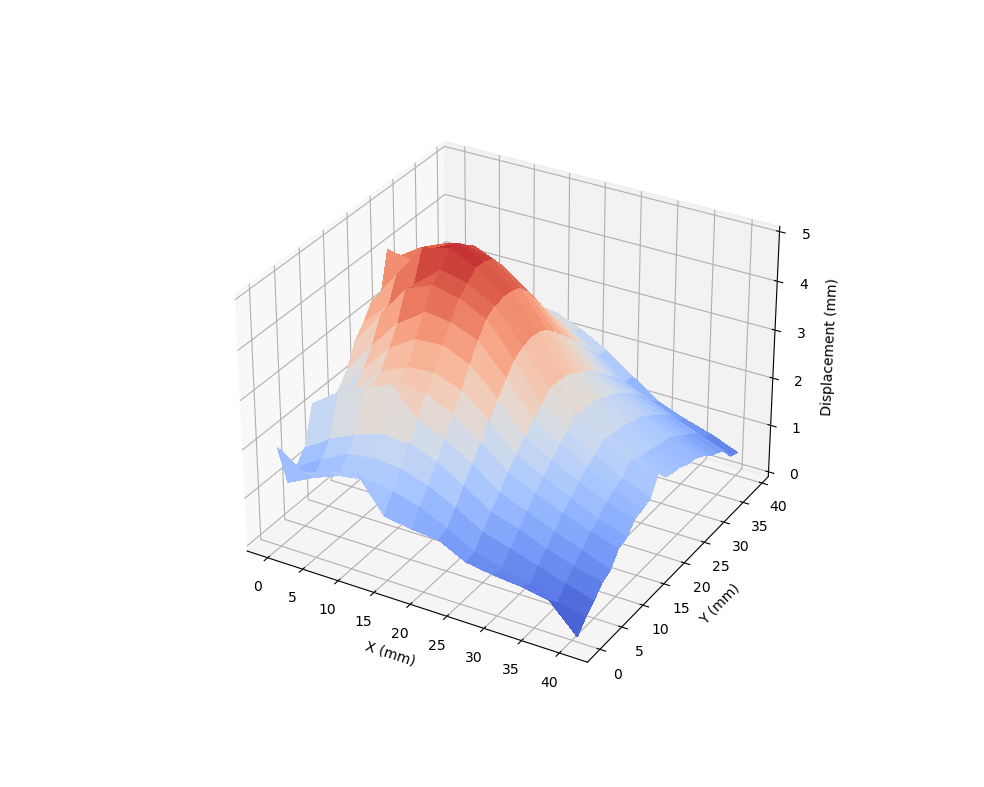

C:\Users\haemi\AppData\Local\Temp\ipykernel_13492\1332706631.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [6]:
X = np.arange(0, 44.4, 3.7)
Y = np.arange(0, 40.7, 1.85)
X, Y = np.meshgrid(X, Y)
Z = filtered_displacement
print (X.shape, Y.shape, Z.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlim(0,5)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False,vmax=5., vmin=0.)
plt.show()
plt.savefig("3d_plot.png")

(22, 12) (22, 12) (22, 12)


<IPython.core.display.Javascript object>


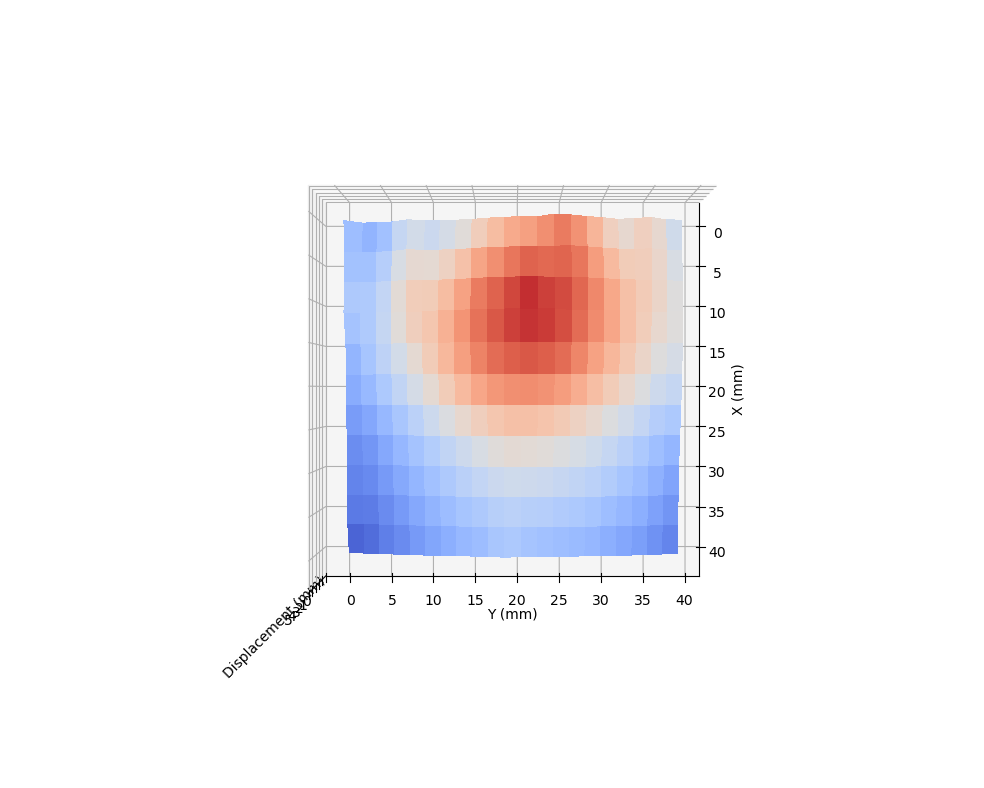

C:\Users\haemi\AppData\Local\Temp\ipykernel_13492\3897540001.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [7]:
X = np.arange(0, 44.4, 3.7)
Y = np.arange(0, 40.7, 1.85)
X, Y = np.meshgrid(X, Y)
Z = filtered_displacement
print (X.shape, Y.shape, Z.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlim(0,5)
ax.azim = 0
ax.elev = 90
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False,vmax=5., vmin=0.)
plt.show()
plt.savefig("3d_plot.png")

(22, 12) (22, 12) (22, 12)


<IPython.core.display.Javascript object>


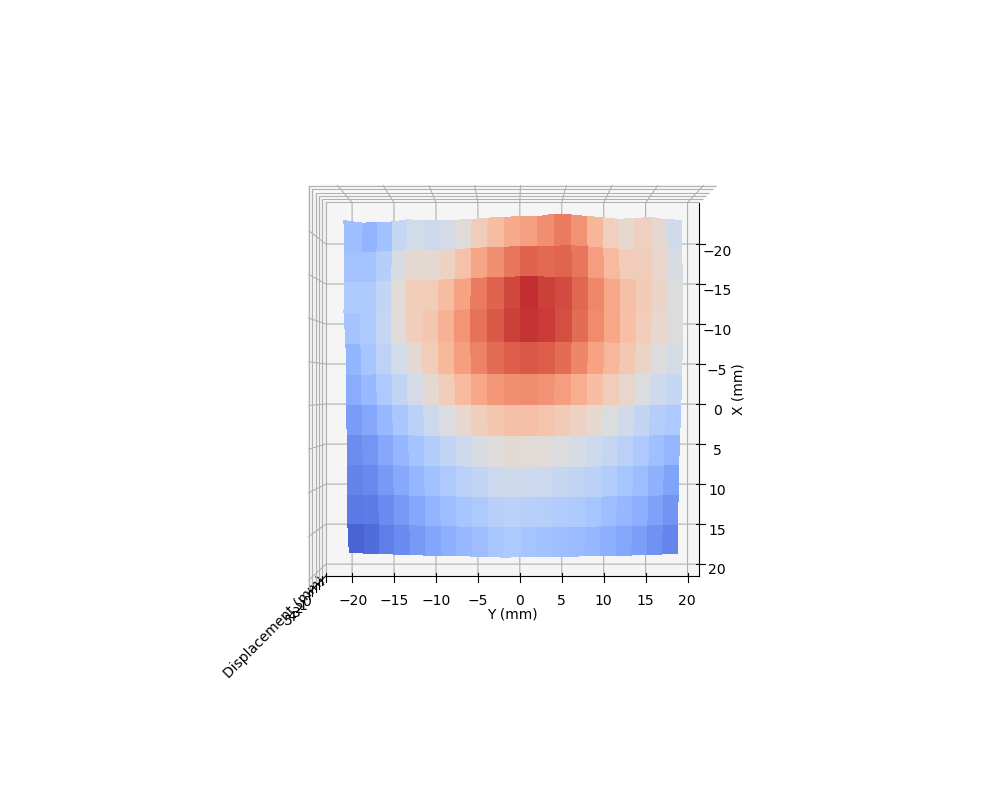

C:\Users\haemi\AppData\Local\Temp\ipykernel_13492\2470046548.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [8]:
X = np.arange(-22.20, 22.2, 3.7)
Y = np.arange(-20.3, 20.4, 1.85)
X, Y = np.meshgrid(X, Y)
Z = filtered_displacement
print (X.shape, Y.shape, Z.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlim(0,5)
ax.azim = 0
ax.elev = 90
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False,vmax=5., vmin=0.)
plt.show()
plt.savefig("3d_plot.png")

<IPython.core.display.Javascript object>


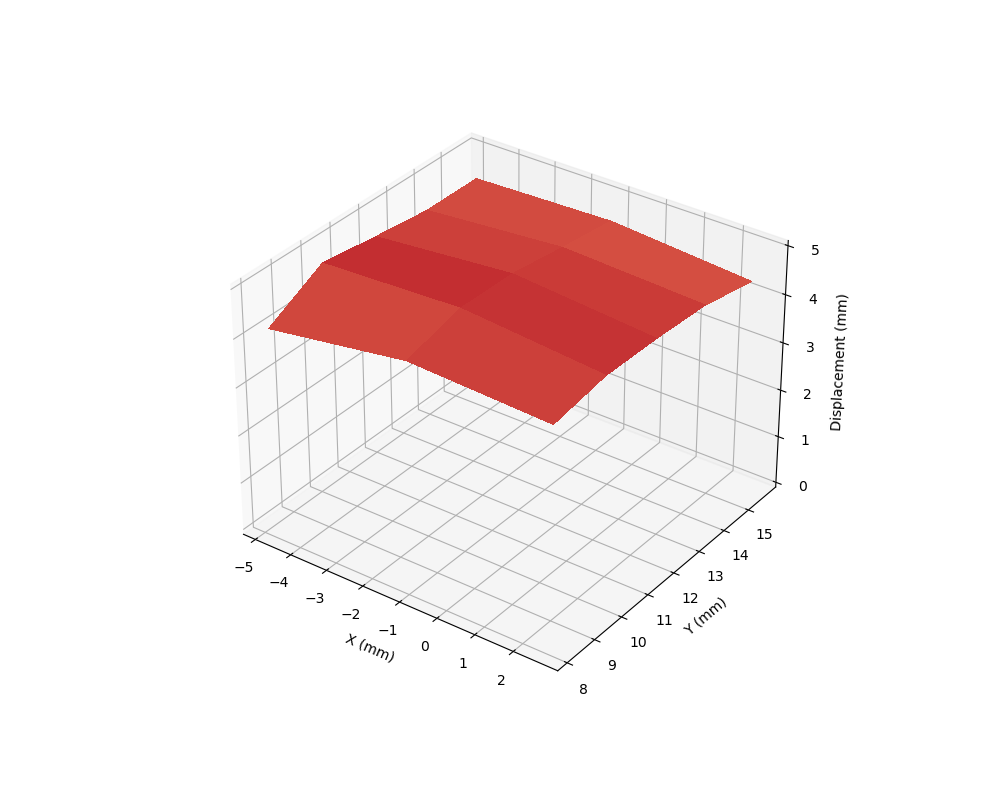

(5, 3) (5, 3) (5, 3)


C:\Users\haemi\AppData\Local\Temp\ipykernel_13492\2111639369.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [9]:
X = np.arange(-12.20, 32.2, 3.7)
Y = np.arange(-10.3, 30.4, 1.85)
X, Y = np.meshgrid(X, Y)

Xsubsample = X[10:15,2:5]
Ysubsample = Y[10:15,2:5]
Zsubsample = Z[10:15,2:5]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlim(0,5)
ax.azim = -54
ax.elev = 32
surf = ax.plot_surface(Xsubsample, Ysubsample, Zsubsample, cmap=cm.coolwarm, linewidth=0, antialiased=False,vmax=5., vmin=0.)
print (Xsubsample.shape, Ysubsample.shape, Zsubsample.shape)
size_flat = Xsubsample.shape[0]*Xsubsample.shape[1]
plt.show()
plt.savefig("radius_extr.png")

In [10]:
Xflat = np.reshape(Xsubsample,(size_flat,))
Yflat = np.reshape(Ysubsample,(size_flat,))
Zflat = np.reshape(Zsubsample,(size_flat,))

(15,)
(15,)
(15,)
[304.3458073]
[20.23106317] [-1.01961804] [11.79039185] [-15.24677233]


C:\Users\haemi\AppData\Local\Temp\ipykernel_13492\694198647.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C, residules, rank, singval = np.linalg.lstsq(A,f)


<IPython.core.display.Javascript object>


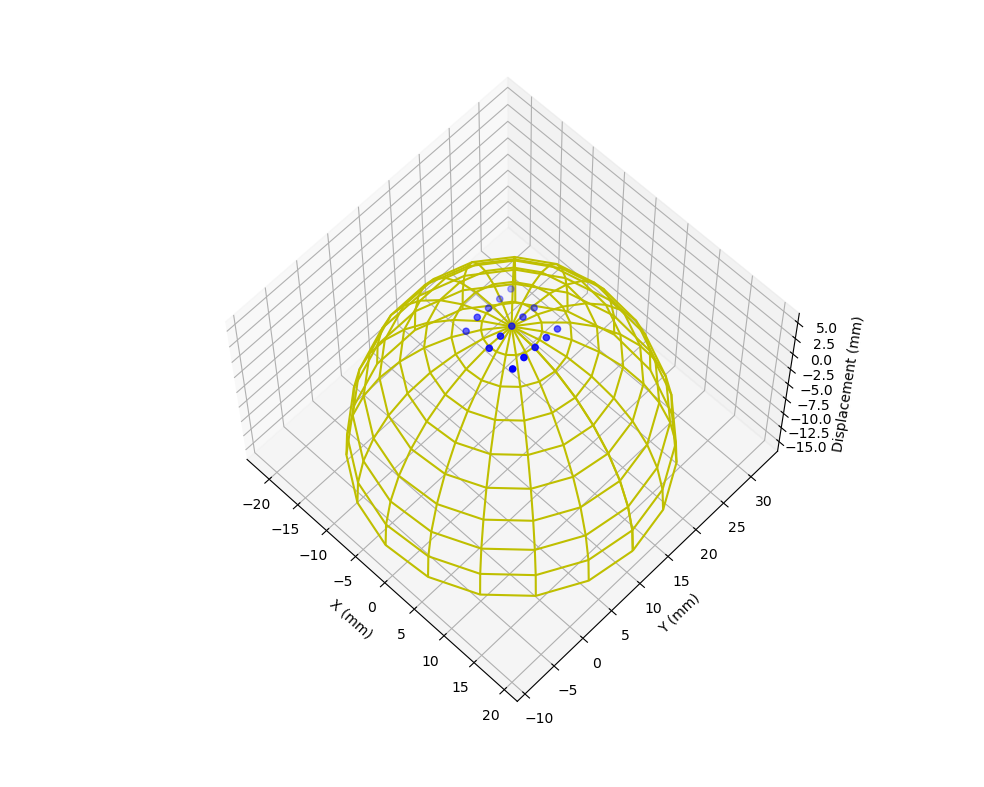

In [13]:
#   Assemble the A matrix
spX = np.array(Xflat)
spY = np.array(Yflat)
spZ = np.array(Zflat)
A = np.zeros((len(spX),4))
print (spX.shape)
print (spY.shape)
print (spZ.shape)
A[:,0] = spX*2
A[:,1] = spY*2
A[:,2] = spZ*2
A[:,3] = 1

#   Assemble the f matrix
f = np.zeros((len(spX),1))
f[:,0] = (spX*spX) + (spY*spY) + (spZ*spZ)
C, residules, rank, singval = np.linalg.lstsq(A,f)

print(residules)
#   solve for the radius
t = (C[0]*C[0])+(C[1]*C[1])+(C[2]*C[2])+C[3]
radius = np.sqrt(t)
r=radius
x0 = C[0]
y0 = C[1]
z0 = C[2] 

print(radius, C[0], C[1], C[2])
u, v = np.mgrid[0:2*np.pi:20j, 0:0.5*np.pi:10j]
x=np.cos(u)*np.sin(v)*r
y=np.sin(u)*np.sin(v)*r
z=np.cos(v)*r
x = x + x0
y = y + y0
z = z + z0

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xflat, Yflat, Zflat, zdir='z', s=20, c='b',rasterized=True)
ax.plot_wireframe(x, y, z, color="y")
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.azim = -46
ax.elev = 62

plt.show()
plt.savefig("radius_est.png")